In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/nlp_analise_sentimento/refs/heads/main/Dados/dataset_avaliacoes.csv')

In [5]:
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [6]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [7]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

text = ['Comprei um produto ótimo','Comprei um produto ruim']

vectorize = CountVectorizer()

bag_of_words = vectorize.fit_transform(text)



In [9]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [10]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns= vectorize.get_feature_names_out())

In [11]:
sparse_matrix

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [13]:
vectorize = CountVectorizer(lowercase=False,max_features=50)

bag_of_words = vectorize.fit_transform(df.avaliacao)

print(bag_of_words.shape)

(15501, 50)


In [14]:
sparse_matrix = pd.DataFrame.sparse.from_spmatrix(bag_of_words,columns= vectorize.get_feature_names_out())

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(bag_of_words,df.sentimento, random_state=4978)

In [26]:
#!pip install xgboost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

print("Classes after encoding:", label_encoder.classes_)


Classes after encoding: [0 1]


In [33]:
xgboost =xgb.XGBClassifier(enable_categorical=True)
xgboost.fit(X_train,y_train)
accuracy = xgboost.score(X_test,y_test)
print(auc)

0.8046955624355006


In [34]:
def text_classifier(text, column_transcription, target):
    vectorize = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vectorize.fit_transform(text[column_transcription])
    X_train, X_test, y_train,y_test = train_test_split(bag_of_words,df.sentimento, random_state=4978)
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)
    xgboost =xgb.XGBClassifier(enable_categorical=True)
    xgboost.fit(X_train,y_train)
    accuracy = xgboost.score(X_test,y_test)
    return print(f"Model accuracy'{column_transcription}': {accuracy * 100:.2f}%")

In [14]:
#!pip install wordcloud # word cloud 
from wordcloud import WordCloud

all_words = [text for text in df.avaliacao] 
all_words = ' '.join([text for text in df.avaliacao])

In [48]:
word_cloud = WordCloud(collocations=False).generate(all_words)

TypeError: Image data of dtype object cannot be converted to float

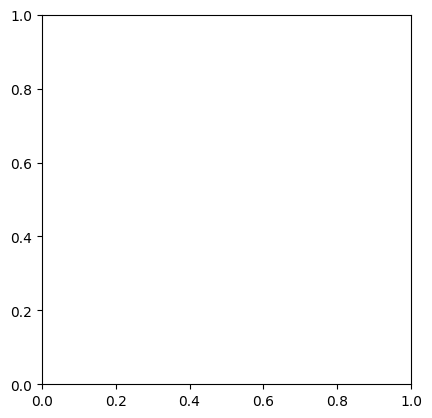

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(word_cloud,interpolation='bilinear')
plt.show()

In [16]:
def word_cloud(df, column_text, sentiment):
    text_sentiment = df.query(f"sentimento=='{sentiment}'")[column_text]
    join_text = ' '.join(text_sentiment)
    word_cloud = WordCloud(collocations=False).generate(join_text)
    plt.figure()
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

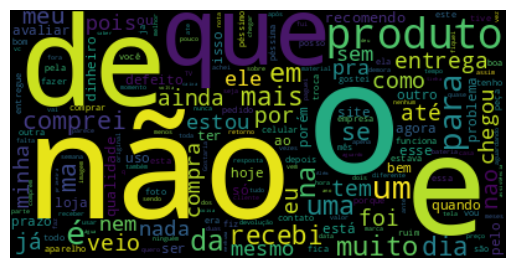

In [17]:
word_cloud(df,'avaliacao','negativo')

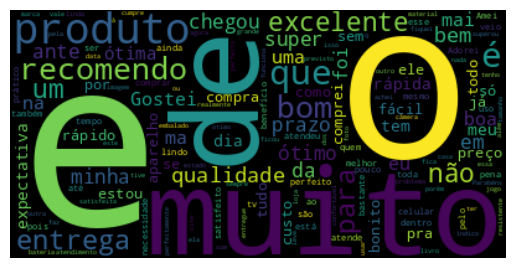

In [18]:
word_cloud(df,'avaliacao','positivo')